### 1-)LİNEAR REGRESYON: 

Bir tane bağımsız değikenin olduğu sonuç olarak çıktı olarak sayısal numeric bir değer döndüren regresyonlardır. iki değişken arasında ki korelasyonu inceler. 

Y = a+bX 

a = sabit değer.

b = eğim => yani regresyon grafiğinde ki çizginin eğimi. bağımsız değişkenleri çarptığımız katsayı demektir.

Örneğin : metrekare ile evin fiyatı arasında ki ilişkiyi gösterebiliriz. Metrekare arttıkça evin fiyatıda ona göre artmaktadır.burda metrekare baımsız değişkendir. evin fiyatı metrekare değişimden etkilendiği için bağımlı değişkendir.

Regresyon :Sonuç olarak yani çıktı olarak sayısal değer üretirler.olarak 

Clasification : Sonuç olarak yani çıktı categoric değer üretirler.

Kümeleme(Clustering) : Benzer gözlemleri aynı kümelere atar.

In [70]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("linearregression.csv", sep=";")
df

,alan,fiyat
0,120,870000
1,140,890000
2,185,1000000
3,210,1200000
4,235,1225000
5,245,1500000
6,100,680000
7,110,725000


Burda bir tane bağımsız alan değişkenimiz bir tanede bağımlı fiyat değişkenimiz var.  Şimdi bu ikisi arasında ki linear modeli yapalım.

#### TEORİ İLE YAPALIM:

##### Normal DENKLEME ÇEVİRİP  tahminde bulunacağız.

In [4]:
df

,alan,fiyat
0,120,870000
1,140,890000
2,185,1000000
3,210,1200000
4,235,1225000
5,245,1500000
6,100,680000
7,110,725000


1-) Bağımsız değişkenimiz alan değişkeninde ki tüm değerlerin toplamını buluruz.

2-) Bağımlı değişkenimiz fiyat değişkeninde ki tüm değerlerin toplamını buluruz.

3-) Bağımlı ve bağımsız değişkenimizin tüm değerlerini sırayla birbiri ile çarpıp sonra tüm değerlerin toplamını buluruz.

4-) Bağımsız alan değişkeninin tüm değerlerinin karelerini alıp toplamını buluruz.

Sonra Normal Denklemi elde ederiz.

In [5]:
# Normal denklemi oluşturma :
x_top = df["alan"].sum()
y_top = df["fiyat"].sum()
yx_carpım_top = (df["alan"] * df["fiyat"]).sum()
x_kare_top = (df["alan"]**2).sum()
print("Alan değişkeninin değerleri toplamı = ", x_top)
print("Fiyat değişkeninin değerleri toplamı = ", y_top)
print("Alan ve fiyat değişkeninin değerleri çarpımları toplamı = ", yx_carpım_top)
print("Alan değişkeninin değerlerinin kareleri toplamı = ", x_kare_top)

Alan değişkeninin değerleri toplamı =  1345
Fiyat değişkeninin değerleri toplamı =  8090000
Alan ve fiyat değişkeninin değerleri çarpımları toplamı =  1469125000
Alan değişkeninin değerlerinin kareleri toplamı =  249675


In [6]:
n = len(df["fiyat"])
n

8

In [ ]:
# Şimdi normal denklemi oluşturalım : 
y_top = 8*a + x_top*b
yx_carpım_top = x_top*a + x_kare_top*b
# Görüldüğü üzere 2 bilinmeyenli denklemimizi oluşturduk. Şimdi Bu 2 bilinmeyenli denklemi Y = a+bX formatına getirelim
# a ve b yi bulalım.

In [7]:
a = np.array([[8,x_top],[x_top,x_kare_top]])
b = np.array([y_top, yx_carpım_top])
a, b = np.linalg.solve(a,b)
a = round(a,2)
b = round(b,2)
print("Sabit sayı = ", a)
print("Eğim yani katsayı değeri = ", b)

Sabit sayı =  233033.18
Eğim yani katsayı değeri =  4628.8


Y = 233033.18 + 4628.8*X 

Normal denklemini elde ettik. Şimdi X değeri yerine alan değerlerini teker teker yazalım.

In [8]:
df["tahmin_one"] = a+ b*df["alan"]
df

,alan,fiyat,tahmin_one
0,120,870000,788489.18
1,140,890000,881065.18
2,185,1000000,1089361.18
3,210,1200000,1205081.18
4,235,1225000,1320801.18
5,245,1500000,1367089.18
6,100,680000,695913.18
7,110,725000,742201.18


### PYTHON İLE TAHMİN YAPALIM :

In [9]:
from sklearn import linear_model
# sklearn kütüphanemiz içinde bulunan linear_modeli import edeceğim bana yukarıda yaptığım işlemleri yapacak.

In [10]:
reg = linear_model.LinearRegression()
# burda linear regresyon işlemi yapacağım için LinearRegression fonksiyonunu reg adlı oluşturduğum değişkenini içine attım.

In [11]:
reg.fit(df[["alan"]], df["fiyat"])
# fit işlemi ile makineye bağımsız değişken ve bağımlı değişken arasında ki ilişkiyi öğrettik.

LinearRegression()

In [12]:
reg.predict(df[["alan"]])
# predict ile makineye alan bağımsız değişken değerlerine göre tahminde bulundurduk.

array([ 788489.05109489,  881065.02986065, 1089360.98208361,
       1205080.95554081, 1320800.92899801, 1367088.91838089,
        695913.07232913,  742201.06171201])

In [13]:
# bu tahminleri df e ekleyelim.
tahmin_1 = list(reg.predict(df[["alan"]]))
tahmin_2 = []
for i in tahmin_1 : 
    tahmin_2.append(round(i,2))
df["tahmin_two"] = tahmin_2
df

,alan,fiyat,tahmin_one,tahmin_two
0,120,870000,788489.18,788489.05
1,140,890000,881065.18,881065.03
2,185,1000000,1089361.18,1089360.98
3,210,1200000,1205081.18,1205080.96
4,235,1225000,1320801.18,1320800.93
5,245,1500000,1367089.18,1367088.92
6,100,680000,695913.18,695913.07
7,110,725000,742201.18,742201.06


In [ ]:
# görüldüğü üzere makinamıza basit linear tahmin yaptırdık.

In [16]:
# mesela 100 metrekare bir ev için tahminde bulunduralım : 
print("100 metrekare evin fiyatı = ", int(reg.predict([[100]])) , "bin tldir.")

100 metrekare evin fiyatı =  695913 bin tldir.


In [17]:
import matplotlib.pyplot as plt

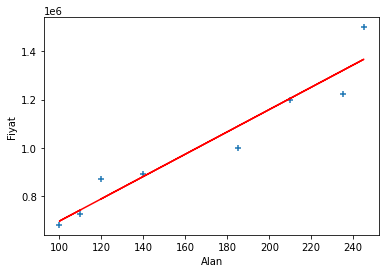

In [18]:
plt.xlabel("Alan")
plt.ylabel("Fiyat")
plt.scatter(df.alan, df.fiyat, marker="+")
plt.plot(df.alan, df.tahmin_one, color="red")
plt.show()
# tahminlerimizi grafik olarak gördük.

In [22]:
# birde tahminimizin hata değerini hesaplayalım : 
# n < 30 ise n-2 ye bölünür.
MSE = (((((df["fiyat"]- df["tahmin_one"])**2).sum()) / (n-2)) ** 0.5)
MSE = int(MSE)
MSE

83792

In [23]:
reg.intercept_
# bizim yukarıda bulduğumuz a değeri.

233033.1785003316

In [24]:
reg.coef_
# bizim b eğim katsayı değerimiz.

array([4628.79893829])

### 2-)Multiple LİNEAR REGRESYON: 

Elimizde 1 den fazla bağımsız değişkenin olduğu Linear modellemelerdir. Bağımsız değişken sayısı 1 den büyük olacak.

Y = a+b1*X1 + b2*X2 .... + bn*Xn

şeklinde ki denklemler ile yapar. Biz linear regresyonda ki gibi normal denkelmi kullanarak yapacağız. yani Y=a+Bx denklemini elde etmeye çalışacağız.

In [38]:
df = pd.read_csv("tutun_multilineargression.csv", sep=";")

In [39]:
df

,tutun_miktar,gubre_kg,fiyat
0,59.2,76.2,23.50
1,65.4,91.7,24.50
2,62.3,106.7,32.10
3,64.7,111.6,32.40
4,67.4,119.0,31.11
5,64.4,129.2,34.10
6,68.0,143.4,35.30
7,73.4,159.6,38.70
8,75.7,180.0,39.60
9,70.7,193.0,46.70


Burda alan bilgisine artı olarak binayasi değişkeni de bulunmaktadır.

#### TEORİ :

çOKLU lİNEAR REGRESYON İÇİN NORMAL DENKLEMİ:

y_sum = n*b1 + x1_sum*b2 + x2_sum*b3

yx1 = b1*x1_sum + b2*x1_kare + b3*x1x2

yx2 = b1*x2_sum + b2*x1x2 + b3*x2_kare

y bağımlı x1 ve x2 ise bağımsız değişkendir.

In [40]:
# 1. adım : değişkenlerin toplamlarını bulalım.
x1_sum = int(df["tutun_miktar"].sum())
x2_sum = int(df["gubre_kg"].sum())
y_sum = int(df["fiyat"].sum())
print(x1_sum , " ", x2_sum ," ", y_sum)

671   1310   338


In [41]:
# 2. adım her bağımsız değişkeni bağımlı değişken ile çarpıp toplamlarını bulalım.
yx1 = int((df["tutun_miktar"] * df["fiyat"]).sum())
yx2 = int((df["gubre_kg"] * df["fiyat"]).sum())
print(yx1, " ",yx2)

22922   46565


In [42]:
# 3. adım bağımsız değişkenlerin karelerinin toplamları : 
x1_kare = int((df["tutun_miktar"]**2).sum())
x2_kare = int((df["gubre_kg"]**2).sum())
print(x1_kare, " ",x2_kare)

45279   184593


In [43]:
# 4. adım : bağımsız değişkenlerin kendi aralarında çarpımlarının toplamları : 
x1x2 = int((df["tutun_miktar"] * df["gubre_kg"]).sum())
print(x1x2)

89454


In [44]:
n = len(df["fiyat"])
n

10

In [ ]:
 5. adım denklemi yazalım .
 
y_sum = n*b1 + x1_sum*b2 + x2_sum*b3

yx1 = b1*x1_sum + b2*x1_kare + b3*x1x2

yx2 = b1*x2_sum + b2*x1x2 + b3*x2_kare

In [ ]:
338 = b1*10+ b2*671 + b3*1310
22922 = b1*671 + b2*45279 + b3*89454
46565 = b1*1310 + b2*89454 + b3*184593

In [45]:
a,b1,b2 = np.linalg.solve(np.array([[10,671,1310],[671,45279,89454],[1310,89454,184593]]),np.array([338,22922,46565]))
a = round(a,1)
b1 = round(b1,2)
b2 = round(b2,2)
print("sabit intercept değeri = ", a)
print("katsayı b1 değeri = ", b1)
print("katsayı b2 değeri = ", b2)

sabit intercept değeri =  34.1
katsayı b1 değeri =  -0.45
katsayı b2 değeri =  0.23


Y = 34.1 - 0.45*X1 + 0.23*X2

In [46]:
df["tahmin_one"] = a + b1*df["tutun_miktar"] + b2*df["gubre_kg"]
df

,tutun_miktar,gubre_kg,fiyat,tahmin_one
0,59.2,76.2,23.50,24.986
1,65.4,91.7,24.50,25.761
2,62.3,106.7,32.10,30.606
3,64.7,111.6,32.40,30.653
4,67.4,119.0,31.11,31.140
5,64.4,129.2,34.10,34.836
6,68.0,143.4,35.30,36.482
7,73.4,159.6,38.70,37.778
8,75.7,180.0,39.60,41.435
9,70.7,193.0,46.70,46.675


### PYTHON İLE YAPALIM :

In [47]:
from sklearn import linear_model
# linear model import edildi.

In [48]:
reg = linear_model.LinearRegression()

In [50]:
reg.fit(df[["tutun_miktar", "gubre_kg"]], df["fiyat"])
# 2 adet bağımsız değişkenimizi ve 1 adet bağımlı fiyat değişkenimizi fit ederek makineye öğrettik.

LinearRegression()

In [51]:
tahmin = list(reg.predict(df[["tutun_miktar", "gubre_kg"]]))
tahmin1 = []
for i in tahmin : 
    tahmin1.append(round(i,3))
df["tahmin_two"] = tahmin1
df

,tutun_miktar,gubre_kg,fiyat,tahmin_one,tahmin_two
0,59.2,76.2,23.50,24.986,24.946
1,65.4,91.7,24.50,25.761,25.318
2,62.3,106.7,32.10,30.606,30.573
3,64.7,111.6,32.40,30.653,30.454
4,67.4,119.0,31.11,31.140,30.771
5,64.4,129.2,34.10,34.836,34.824
6,68.0,143.4,35.30,36.482,36.284
7,73.4,159.6,38.70,37.778,37.253
8,75.7,180.0,39.60,41.435,40.894
9,70.7,193.0,46.70,46.675,46.693


In [52]:
# Hem matematik hem de program ile tahminleme de bulunduk.

In [55]:
# Bir örnek daha yapalım : 
df = pd.read_csv("multilinearregression.csv", sep=";")
df

,alan,odasayisi,binayasi,fiyat
0,180,5,10,510000
1,225,4,18,508000
2,260,3,2,548000
3,320,6,10,650000
4,335,4,9,628000
5,345,5,14,632000
6,355,3,0,680000
7,400,4,10,725000


In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
reg = LinearRegression()

In [58]:
reg.fit(df[["alan", "odasayisi", "binayasi"]], df["fiyat"])

LinearRegression()

In [59]:
tahmin = list(reg.predict(df[["alan", "odasayisi", "binayasi"]]))
tahmin1 = []
for i in tahmin : 
    tahmin1.append(int(i))
df["tahmin_fiyat"] = tahmin1
df

,alan,odasayisi,binayasi,fiyat,tahmin_fiyat
0,180,5,10,510000,494187
1,225,4,18,508000,504294
2,260,3,2,548000,566772
3,320,6,10,650000,651740
4,335,4,9,628000,639844
5,345,5,14,632000,651895
6,355,3,0,680000,668791
7,400,4,10,725000,703473


### 3-)Polyominal REGRESYON: 

Y = a+b1x1 + b2*x2**2 + b3*x3**3 + .... + bn*xn**n şeklinde ki denklemlerdir.

Bağımlı ve bağımsız değişkenler arasında linear yani doğrusal bir ilişki yoksa kullanılır. Yani scatter grafiğinde değişkenler arasında ki ilişki düz bir çizgi ile olmuyorsa kullanılır.

In [71]:
df = pd.read_csv("polynomial.csv", sep=";")
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


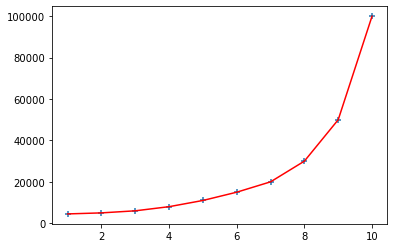

In [65]:
plt.scatter(df.deneyim, df.maas, marker="+")
plt.plot(df.deneyim, df.maas, color="red")
plt.show()

In [66]:
# grafiğe bakıldığı üzere linear regresyon uygularsak düz çizgi ile aptalca bir tahmin modeli sunar.

#### TEORİ : 

In [67]:
df

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


Daha net görülmesi için 2. kuvvetine kadar polinom regresyon alalım degree = 2 ye kadar yani

Y = a+ b1*x1 + b2*(X2**2) ye kadar.

In [ ]:
# 1. adım iki değişkenin toplamlarını bulalım : 
x_top = df["deneyim"].sum()
y_top = df["maas"].sum()
# 2. adım iki değişkenin çarpımlarının toplamları bulunur. :
yx_carpım_top = (df["deneyim"] * df["maas"]).sum()
# 3. adım bağımsız değişkenimiz olan deneyim değişkeninin karesi, küpü ve 4. kuvvetlerinin toplamları alınır.
x_kare_top = (df["deneyim"]**2).sum()
x_kup_top = (df["deneyim"]**3).sum()
x_dorduncu_kuvvet_top = (df["deneyim"]**4).sum()
# 4. adım bağımsız değişkeninin karesi ile bağımlı değişken çarpılır ve toplamları alınır.
yx_kare_top = ((df["deneyim"]**2) * df["maas"]).sum()

In [ ]:
# Denklemi yazalım : 
y_top = a*n + b1*x_top + b2*x_kare_top
yx_carpım_top = a*x_top + b1*x_kare_top + b2*x_kup_top
yx_kare_top = a*x_kare_top + b1*x_kup_top + b2*x_dorduncu_kuvvet_top

In [ ]:
249500 = a0*10 + a1*55 + a2*385
2039500 = a0*55 + a1*385 + a2*3025
17971500 = a0*385 + a1*3025 + a2*25333

In [72]:
a = np.array([[10,55,385],[55,385,3025],[385,3025,25333]])
b = np.array([249500,2039500,17971500])
a, b1, b2 = np.linalg.solve(a,b)
a = int(a)
b1 = int(b1)
b2 = int(b2)
print("a değeri = ", a , "b1 değeri = ", b1 , "b2 değeri = ", b2)

a değeri =  23216 b1 değeri =  -13287 b2 değeri =  1943


Y = 23216 - 13287*X + 1943*(X**2) denklemini elde ettik.

In [73]:
df["maas_one"] = a+ (b1*df["deneyim"]) + (b2*(df["deneyim"]**2))
df

,deneyim,maas,maas_one
0,1,4500,11872
1,2,5000,4414
2,3,6000,842
3,4,8000,1156
4,5,11000,5356
5,6,15000,13442
6,7,20000,25414
7,8,30000,41272
8,9,50000,61016
9,10,100000,84646


#### PYTHON İLE YAPALIM :

In [74]:
from sklearn.linear_model import LinearRegression
# ilk önce Lineare Regresyon fonksiyonumuzu kullanmak için import ettik.

In [75]:
from sklearn.preprocessing import PolynomialFeatures
# sonra preproccessing içindeki PolynomialFeatures kütüphanemizi import ettik.

In [77]:
polyominal_reg = PolynomialFeatures(degree=2)
# sadece 2. kuvvetine kadar denklem oluşturduk dedik.

In [79]:
x_polyominal = polyominal_reg.fit_transform(df[["deneyim"]])
# linear regresyondan farklı olarak ilk önce x_polyominal değişkeni oluşturup sonrasında fit_transform ile öğretiyoruz.

In [80]:
reg = LinearRegression()

In [81]:
reg.fit(x_polyominal, df["maas"])
# makinaya fit ettik yani değerlere göre eğittik.

LinearRegression()

In [83]:
tahmin = list(reg.predict(x_polyominal))
tahmin1 = []
for i in tahmin : 
    tahmin1.append(int(i))
df["fiyat_tahmin2"] = tahmin1
df

,deneyim,maas,maas_one,fiyat_tahmin2
0,1,4500,11872,11872
1,2,5000,4414,4415
2,3,6000,842,843
3,4,8000,1156,1159
4,5,11000,5356,5360
5,6,15000,13442,13448
6,7,20000,25414,25422
7,8,30000,41272,41283
8,9,50000,61016,61030
9,10,100000,84646,84663
